# **ETL DEL DATASET DE DATOS PÚBLICOS SRI PRESIÓN FÍSCAL**

1. Instalacion de dependecias y librerías

In [3]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [6]:
pip install pandas matplotlib seaborn gspread gspread_dataframe google-auth google-cloud-bigquery

*Montar Google Drive:*

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Autenticación para Google Cloud (incluyendo BigQuery):*

In [8]:
from google.colab import auth
auth.authenticate_user()

2. Carga y procesamiento de datos

In [13]:
import requests
import os
from bs4 import BeautifulSoup
from google.colab import drive
from datetime import datetime

# 1. Montar Google Drive
print("Montando Google Drive...")
drive.mount('/content/drive')
print("Google Drive montado correctamente.")

# Definir la ruta a la carpeta en Google Drive
drive_folder_path = '/content/drive/MyDrive/Presión Fiscal'

# 2. Crear la carpeta "Presión Fiscal" en Google Drive si no existe
if not os.path.exists(drive_folder_path):
    print(f"Creando la carpeta: {drive_folder_path}")
    os.makedirs(drive_folder_path)
    print("Carpeta 'Presión Fiscal' creada.")
else:
    print(f"La carpeta '{drive_folder_path}' ya existe.")

# URL de la página web del SRI con los datasets
sri_datasets_url = "https://www.sri.gob.ec/datasets#Presi%C3%B3n%20Fiscal"

print(f"Intentando obtener la página web: {sri_datasets_url}")

# Obtener la fecha actual para nombrar los archivos CSV
now = datetime.now()
current_month_year = now.strftime("%Y-%m")

try:
    response = requests.get(sri_datasets_url)
    response.raise_for_status() # Lanza una excepción para códigos de estado de error

    soup = BeautifulSoup(response.content, 'html.parser')

    # --- Descargar el archivo CSV de Presión Fiscal ---
    print("\n--- Procesando archivo CSV de Presión Fiscal ---")
    csv_url = None
    csv_file_name_prefix = "SRI_Presion_Fiscal"
    csv_download_link = soup.find('a', string='Descargar', href=lambda href: href and href.lower().endswith('.csv'))

    if csv_download_link and 'href' in csv_download_link.attrs:
        csv_url = csv_download_link['href']
        print(f"Enlace de descarga CSV encontrado: {csv_url}")

        # Nombre del archivo CSV con fecha
        csv_file_name = f"{csv_file_name_prefix}_{current_month_year}.csv"
        csv_file_path = os.path.join(drive_folder_path, csv_file_name)

        # Verificar si ya existe un archivo CSV para el mes y año actual
        if os.path.exists(csv_file_path):
            print(f"El archivo '{csv_file_name}' para este mes y año ya existe. No se descargará de nuevo.")
        else:
            print(f"Intentando descargar el archivo desde: {csv_url}")
            try:
                file_response = requests.get(csv_url, stream=True)
                file_response.raise_for_status()

                with open(csv_file_path, 'wb') as f:
                    for chunk in file_response.iter_content(chunk_size=8192):
                        f.write(chunk)

                print(f"Archivo '{csv_file_name}' descargado y guardado en: {csv_file_path}")

            except requests.exceptions.RequestException as e:
                print(f"Error al descargar el archivo CSV: {e}")
            except Exception as e:
                print(f"Ocurrió un error inesperado durante la descarga del archivo CSV: {e}")

    else:
        print("No se encontró un enlace de descarga para un archivo CSV con el texto 'Descargar' en la página.")


    # --- Descargar el archivo Excel del Diccionario de variables ---
    print("\n--- Procesando archivo Excel del Diccionario de variables ---")
    excel_url = None
    excel_file_name = "SRI_Diccionario_Presion.xlsx"
    excel_file_path = os.path.join(drive_folder_path, excel_file_name)

    # Verificar si el archivo Excel ya existe
    if os.path.exists(excel_file_path):
        print(f"El archivo '{excel_file_name}' ya existe. No se descargará de nuevo.")
    else:
        # Buscar el enlace que contiene el texto "descargar" y termina con ".xlsx"
        excel_download_link = soup.find('a', string='descargar', href=lambda href: href and href.lower().endswith('.xlsx'))

        if excel_download_link and 'href' in excel_download_link.attrs:
            excel_url = excel_download_link['href']
            print(f"Enlace de descarga Excel encontrado: {excel_url}")

            print(f"Intentando descargar el archivo desde: {excel_url}")
            try:
                file_response = requests.get(excel_url, stream=True)
                file_response.raise_for_status()

                with open(excel_file_path, 'wb') as f:
                    for chunk in file_response.iter_content(chunk_size=8192):
                        f.write(chunk)

                print(f"Archivo '{excel_file_name}' descargado y guardado en: {excel_file_path}")

            except requests.exceptions.RequestException as e:
                print(f"Error al descargar el archivo Excel: {e}")
            except Exception as e:
                print(f"Ocurrió un error inesperado durante la descarga del archivo Excel: {e}")

        else:
            print("No se encontró un enlace de descarga para un archivo Excel con el texto 'descargar' en la página.")

except requests.exceptions.RequestException as e:
    print(f"Error al acceder a la página web: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado durante el análisis de la página: {e}")

Montando Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado correctamente.
Creando la carpeta: /content/drive/MyDrive/Presión Fiscal
Carpeta 'Presión Fiscal' creada.
Intentando obtener la página web: https://www.sri.gob.ec/datasets#Presi%C3%B3n%20Fiscal

--- Procesando archivo CSV de Presión Fiscal ---
Enlace de descarga CSV encontrado: https://descargas.sri.gob.ec/download/datosAbiertos/SRI_RUC_Azuay.csv
Intentando descargar el archivo desde: https://descargas.sri.gob.ec/download/datosAbiertos/SRI_RUC_Azuay.csv
Archivo 'SRI_Presion_Fiscal_2025-06.csv' descargado y guardado en: /content/drive/MyDrive/Presión Fiscal/SRI_Presion_Fiscal_2025-06.csv

--- Procesando archivo Excel del Diccionario de variables ---
Enlace de descarga Excel encontrado: https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/a425b664-828d-4ef4-a103-fe689237d25f/SRI_Diccionario_Ca

Cambio de formatos

In [42]:
import pandas as pd
import requests
import io
from IPython.display import display # Para mejor visualización en Colab

# URL directa del archivo CSV
csv_url = "https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/7e45627e-1f7e-4e21-ae59-d520634fc63f/SRI_Presion_Fiscal.csv"

print(f"Intentando descargar el archivo CSV desde: {csv_url}")

# Descargar el contenido del archivo
try:
    response = requests.get(csv_url)
    response.raise_for_status() # Lanza una excepción para códigos de estado de error (4xx o 5xx)

    # Lista de codificaciones a probar (mantener por si hay problemas de caracteres)
    codificaciones_a_probar = ['utf-8', 'latin-1', 'cp1252', 'ISO-8859-1']

    csv_content = None
    codificacion_exitosa = None

    print("Intentando decodificar el contenido con diferentes codificaciones...")
    for encoding in codificaciones_a_probar:
        try:
            csv_content = response.content.decode(encoding)
            codificacion_exitosa = encoding
            print(f"Contenido decodificado exitosamente con codificación: '{encoding}'")
            break
        except Exception as e:
            print(f"Error al decodificar con '{encoding}': {e}")
            csv_content = None

    if csv_content is not None:
        print("\nContenido del archivo descargado y decodificado exitosamente.")

        # --- Cargar el contenido en un DataFrame, FORZANDO EL SEPARADOR PUNTO Y COMA ---
        df = None
        print("\nIntentando cargar el contenido CSV en un DataFrame con separador ';'")
        try:
            # Usar io.StringIO para tratar el string como un archivo en memoria
            # Forzar el uso del separador punto y coma
            df = pd.read_csv(io.StringIO(csv_content), sep=';')
            print("Archivo CSV cargado exitosamente con separador ';'")

        except Exception as e:
            print(f"Error al cargar con separador ';': {e}")
            print("\nNo se pudo cargar el archivo CSV forzando el separador ';'")
            print("El formato del archivo podría ser diferente o requerir opciones de parseo adicionales.")
            df = None # Asegurar que df sea None si la carga falla

        # --- Continuar con Limpieza y Formato solo si el DataFrame se cargó correctamente ---
        if df is not None:
            print("\nDataFrame cargado exitosamente con columnas separadas.")

            # Opcional: Mostrar las primeras filas y la información ANTES de la limpieza para verificar
            print("\nDataFrame cargado (antes de la limpieza/formato):")
            display(df.head())
            print("\nInformación del DataFrame cargado (antes de la limpieza/formato):")
            df.info()

            # --- Proceso de Limpieza del DataFrame ---
            print("\n--- Iniciando proceso de limpieza del DataFrame ---")

            # 1. Quitar columnas innecesarias (Ajusta esta lista si es necesario)
            columnas_a_eliminar = [] # <--- Edita esta lista con los nombres exactos si necesitas eliminar algo

            columnas_existentes_a_eliminar = [col for col in columnas_a_eliminar if col in df.columns]

            if columnas_existentes_a_eliminar:
                print(f"\nEliminando columnas innecesarias: {columnas_existentes_a_eliminar}")
                df = df.drop(columns=columnas_existentes_a_eliminar)
                print("Columnas eliminadas.")
            else:
                print("\nNo se encontraron las columnas especificadas para eliminar, o la lista está vacía.")

            # 2. Eliminar duplicados
            filas_antes_duplicados = len(df)
            df.drop_duplicates(inplace=True)
            filas_despues_duplicados = len(df)
            print(f"\nEliminando filas duplicadas.")
            print(f"Se eliminaron {filas_antes_duplicados - filas_despues_duplicados} filas duplicadas.")

            # 3. Normalizar los nombres de columna (a minúsculas y con guiones bajos)
            print("\nNormalizando nombres de columnas...")
            df.columns = df.columns.str.replace(' ', '_').str.lower()
            print("Nombres de columnas normalizados.")
            print("Nuevos nombres de columnas:", df.columns.tolist())

            print("\n--- Proceso de limpieza completado ---")

            # Opcional: Mostrar las primeras filas y la información después de la limpieza
            print("\nDataFrame después de la limpieza:")
            display(df.head())
            print("\nInformación del DataFrame después de la limpieza:")
            df.info()


            # --- Proceso de Transformación para Formato Específico ---
            print("\n--- Iniciando Transformación para Formato Específico ---")

            # Nombres exactos de las columnas después de la normalización
            col_region = 'region'
            col_pais = 'país'
            col_año = 'año'
            col_presion = '_%_presion_'
            col_tipo_presion = 'tipo_presion' # O ajusta si es 'tipo_presion_fiscal'

            # 1. Formatear Columna 'año' como Número Entero
            print(f"\nIntentando formatear columna '{col_año}' como Número Entero...")
            if col_año in df.columns:
                try:
                    df[col_año] = pd.to_numeric(df[col_año], errors='coerce').astype('Int64')
                    print(f"Columna '{col_año}' formateada exitosamente a Número Entero.")
                except Exception as e:
                    print(f"Advertencia: No se pudo formatear la columna '{col_año}' como Número Entero. Error: {e}")
            else:
                print(f"Advertencia: La columna '{col_año}' no se encontró después de la limpieza.")


            # 2. Formatear Columna '_%_presion_' como Número Decimal con 2 decimales
            print(f"\nIntentando formatear columna '{col_presion}' como Número Decimal (Flotante) y a string con 2 decimales...")
            if col_presion in df.columns:
                try:
                    df[col_presion] = pd.to_numeric(df[col_presion], errors='coerce')
                    print(f"Columna '{col_presion}' convertida a Número Decimal (Flotante).")
                    df[col_presion] = df[col_presion].apply(lambda x: f"{x:.2f}" if pd.notnull(x) else x)
                    print(f"Columna '{col_presion}' formateada a string con 2 decimales.")
                except Exception as e:
                    print(f"Advertencia: No se pudo formatear la columna '{col_presion}' como Número Decimal. Error: {e}")
            else:
                print(f"Advertencia: La columna '{col_presion}' no se encontró después de la limpieza.")

            # 3. Columnas de Texto ('region', 'país', 'tipo_presion' o 'tipo_presion_fiscal')
            columnas_de_texto_especificas = [col_region, col_pais, col_tipo_presion]
            print("\nVerificando y normalizando columnas de texto específicas...")
            for col in columnas_de_texto_especificas:
                if col in df.columns:
                     if df[col].dtype != 'object' and df[col].dtype != 'string':
                          print(f"Advertencia: La columna '{col}' no es de tipo texto. Convirtiendo a string.")
                          try:
                              df[col] = df[col].astype(str)
                          except Exception as e:
                              print(f"Error al convertir '{col}' a string: {e}")

                     if df[col].dtype == 'object' or df[col].dtype == 'string':
                         try:
                             df[col] = df[col].apply(lambda x: str(x).lower().strip() if pd.notnull(x) else x)
                             print(f"Columna '{col}' normalizada.")
                         except Exception as e:
                              print(f"Advertencia: No se pudo normalizar la columna de texto '{col}'. Error: {e}")
                else:
                    print(f"Advertencia: La columna de texto específica '{col}' no se encontró después de la limpieza.")

            print("\n--- Proceso de Transformación completado ---")

            # Mostrar las primeras filas y la información después de la transformación
            print("\nDataFrame después de la transformación de formato:")
            display(df.head())
            print("\nInformación del DataFrame después de la transformación de formato:")
            df.info()

        else:
            print("\nEl DataFrame no se pudo cargar correctamente. No se pudo proceder con limpieza o formato.")

    else:
        print("\nNo se pudo decodificar el contenido del archivo con ninguna de las codificaciones probadas.")


except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo desde la URL: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado durante la descarga o procesamiento: {e}")

Intentando descargar el archivo CSV desde: https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/7e45627e-1f7e-4e21-ae59-d520634fc63f/SRI_Presion_Fiscal.csv
Intentando decodificar el contenido con diferentes codificaciones...
Error al decodificar con 'utf-8': 'utf-8' codec can't decode byte 0xed in position 9: invalid continuation byte
Contenido decodificado exitosamente con codificación: 'latin-1'

Contenido del archivo descargado y decodificado exitosamente.

Intentando cargar el contenido CSV en un DataFrame con separador ';'
Archivo CSV cargado exitosamente con separador ';'

DataFrame cargado exitosamente con columnas separadas.

DataFrame cargado (antes de la limpieza/formato):


,Region,País,Año,%_Presion,Tipo_Presion
0,America Latina,Argentina,2004,"0,2433",Presión Fiscal Total
1,America Latina,Argentina,2005,"0,2453",Presión Fiscal Total
2,America Latina,Argentina,2006,"0,2508",Presión Fiscal Total
3,America Latina,Argentina,2007,"0,2637",Presión Fiscal Total
4,America Latina,Argentina,2008,"0,2762",Presión Fiscal Total



Información del DataFrame cargado (antes de la limpieza/formato):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        3043 non-null   object
 1   País          3043 non-null   object
 2   Año           3043 non-null   int64 
 3    %_Presion    3043 non-null   object
 4   Tipo_Presion  3043 non-null   object
dtypes: int64(1), object(4)
memory usage: 119.0+ KB

--- Iniciando proceso de limpieza del DataFrame ---

No se encontraron las columnas especificadas para eliminar, o la lista está vacía.

Eliminando filas duplicadas.
Se eliminaron 0 filas duplicadas.

Normalizando nombres de columnas...
Nombres de columnas normalizados.
Nuevos nombres de columnas: ['region', 'país', 'año', '_%_presion_', 'tipo_presion']

--- Proceso de limpieza completado ---

DataFrame después de la limpieza:


,region,país,año,_%_presion_,tipo_presion
0,America Latina,Argentina,2004,"0,2433",Presión Fiscal Total
1,America Latina,Argentina,2005,"0,2453",Presión Fiscal Total
2,America Latina,Argentina,2006,"0,2508",Presión Fiscal Total
3,America Latina,Argentina,2007,"0,2637",Presión Fiscal Total
4,America Latina,Argentina,2008,"0,2762",Presión Fiscal Total



Información del DataFrame después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        3043 non-null   object
 1   país          3043 non-null   object
 2   año           3043 non-null   int64 
 3   _%_presion_   3043 non-null   object
 4   tipo_presion  3043 non-null   object
dtypes: int64(1), object(4)
memory usage: 119.0+ KB

--- Iniciando Transformación para Formato Específico ---

Intentando formatear columna 'año' como Número Entero...
Columna 'año' formateada exitosamente a Número Entero.

Intentando formatear columna '_%_presion_' como Número Decimal (Flotante) y a string con 2 decimales...
Columna '_%_presion_' convertida a Número Decimal (Flotante).
Columna '_%_presion_' formateada a string con 2 decimales.

Verificando y normalizando columnas de texto específicas...
Columna 'region' normalizada.
Columna '

,region,país,año,_%_presion_,tipo_presion
0,america latina,argentina,2004,NaN,presión fiscal total
1,america latina,argentina,2005,NaN,presión fiscal total
2,america latina,argentina,2006,NaN,presión fiscal total
3,america latina,argentina,2007,NaN,presión fiscal total
4,america latina,argentina,2008,NaN,presión fiscal total



Información del DataFrame después de la transformación de formato:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        3043 non-null   object 
 1   país          3043 non-null   object 
 2   año           3043 non-null   Int64  
 3   _%_presion_   0 non-null      float64
 4   tipo_presion  3043 non-null   object 
dtypes: Int64(1), float64(1), object(3)
memory usage: 122.0+ KB


from matplotlib import pyplot as plt
_df_5['año'].plot(kind='hist', bins=20, title='año')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['año'].plot(kind='line', figsize=(8, 4), title='año')
plt.gca().spines[['top', 'right']].set_visible(False)

3. Visualizacion de los datos

In [45]:
import pandas as pd
import requests
import io
from IPython.display import display # Para mejor visualización en Colab

# --- Repetición de la descarga y carga (asegúrate de que esta parte ya funcione) ---
# (Mantengo la descarga y carga aquí por si ejecutas esta celda por separado)
csv_url = "https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/7e45627e-1f7e-4e21-ae59-d520634fc63f/SRI_Presion_Fiscal.csv"
print(f"Intentando descargar y cargar el archivo desde: {csv_url}")
df = None # Inicializar df
try:
    response = requests.get(csv_url)
    response.raise_for_status()
    codificaciones_a_probar = ['utf-8', 'latin-1', 'cp1252', 'ISO-8859-1']
    csv_content = None
    for encoding in codificaciones_a_probar:
        try:
            csv_content = response.content.decode(encoding)
            break
        except: pass # Ignorar errores de decodificación
    if csv_content:
        try:
            df = pd.read_csv(io.StringIO(csv_content), sep=';') # Forzar separador ;
            print("Archivo CSV cargado con separador ';'")
        except: pass # Ignorar error de carga si separador no es ;
        if df is None: # Si falló con ';', intentar con ',' como fallback (menos probable)
            try:
                 df = pd.read_csv(io.StringIO(csv_content), sep=',')
                 print("Archivo CSV cargado con separador ','")
            except: pass
    if df is not None:
        # --- Limpieza básica (normalización de nombres) si no se hizo antes ---
        # Asegurarnos de tener los nombres de columna normalizados para trabajar con ellos
        print("\nAsegurando nombres de columnas normalizados...")
        df.columns = df.columns.str.replace(' ', '_').str.lower()
        print("Nombres de columnas:", df.columns.tolist())

        # --- Continuar con el Formato si el DataFrame se cargó correctamente ---
        print("\n--- Iniciando Transformación para Formato Específico (Basado en tus requisitos) ---")

        # Nombres exactos de las columnas después de la normalización
        col_region = 'region'
        col_pais = 'país'
        col_año = 'año'
        col_dinero_presion = '_%_presion_' # Renombramos la variable para reflejar que es dinero
        col_tipo_presion = 'tipo_presion' # O ajusta si es 'tipo_presion_fiscal'

        # 1. Formatear Columna 'año' como Número Entero
        print(f"\nIntentando formatear columna '{col_año}' como Número Entero...")
        if col_año in df.columns:
            try:
                # Convertir a tipo entero, forzando errores a NaN
                df[col_año] = pd.to_numeric(df[col_año], errors='coerce').astype('Int64')
                print(f"Columna '{col_año}' formateada exitosamente a Número Entero.")
            except Exception as e:
                print(f"Advertencia: No se pudo formatear la columna '{col_año}' como Número Entero. Error: {e}")
        else:
            print(f"Advertencia: La columna '{col_año}' no se encontró.")


        # 2. Formatear Columna '_%_presion_' (Dinero) a Formato Numérico Americano
        print(f"\nIntentando formatear columna '{col_dinero_presion}' (Dinero) a Formato Numérico Americano (coma miles, punto decimal)...")
        if col_dinero_presion in df.columns:
            try:
                # --- LIMPIEZA Y CONVERSIÓN A NUMÉRICO ---
                # Convertir a string primero
                df[col_dinero_presion] = df[col_dinero_presion].astype(str)

                # Eliminar cualquier símbolo de moneda si existe (ej: '$', 'USD ')
                # Ajusta esto si hay símbolos específicos que necesitas remover
                df[col_dinero_presion] = df[col_dinero_presion].str.replace('$', '', regex=False)
                df[col_dinero_presion] = df[col_dinero_presion].str.replace('USD', '', regex=False)
                # ... añade otros símbolos si es necesario

                # Eliminar posibles espacios extra
                df[col_dinero_presion] = df[col_dinero_presion].str.strip()

                # Si el separador decimal es una coma en el CSV original, reemplazarlo por un punto
                # IMPORTANTE: Si tus datos usan puntos para miles y comas para decimales,
                # primero elimina los puntos de miles, luego cambia las comas por puntos decimales.
                # Asumiendo que tus datos usan coma para decimales y punto para miles (formato europeo),
                # eliminamos puntos de miles y cambiamos coma decimal por punto.
                df[col_dinero_presion] = df[col_dinero_presion].str.replace('.', '', regex=False) # Eliminar separador de miles (punto)
                df[col_dinero_presion] = df[col_dinero_presion].str.replace(',', '.', regex=False) # Cambiar separador decimal (coma a punto)

                # Convertir a tipo flotante. coerce hará que los valores no convertibles se vuelvan NaN.
                df[col_dinero_presion] = pd.to_numeric(df[col_dinero_presion], errors='coerce')
                print(f"Columna '{col_dinero_presion}' limpiada y convertida a Número Decimal (Flotante).")

                # --- Formatear a string con formato americano (para visualización/exportación) ---
                # Usamos el formato de string para añadir separadores de miles con coma y punto decimal
                print(f"Formateando '{col_dinero_presion}' a string con formato numérico americano (2 decimales)...")
                df[col_dinero_presion] = df[col_dinero_presion].apply(lambda x: f"{x:,.2f}" if pd.notnull(x) else x)
                print(f"Columna '{col_dinero_presion}' formateada a string con formato americano.")

            except Exception as e:
                print(f"Advertencia: Error durante la limpieza/formateo de la columna '{col_dinero_presion}'. Error: {e}")
        else:
            print(f"Advertencia: La columna '{col_dinero_presion}' no se encontró.")

        # 3. Columnas de Texto ('region', 'país', 'tipo_presion')
        # Aseguramos que sean de tipo string y normalizamos texto
        columnas_de_texto_especificas = [col_region, col_pais, col_tipo_presion]
        print("\nVerificando y normalizando columnas de texto específicas...")
        for col in columnas_de_texto_especificas:
            if col in df.columns:
                 # Convertir a string si no lo es
                 if df[col].dtype != 'object' and df[col].dtype != 'string':
                      print(f"Columna '{col}' no es de tipo texto. Convirtiendo a string.")
                      try:
                          df[col] = df[col].astype(str)
                      except Exception as e:
                          print(f"Error al convertir '{col}' a string: {e}")

                 # Normalizar texto (minúsculas y sin espacios extra) si ya es string/object
                 if df[col].dtype == 'object' or df[col].dtype == 'string':
                     try:
                         df[col] = df[col].apply(lambda x: str(x).lower().strip() if pd.notnull(x) else x)
                         print(f"Columna '{col}' normalizada.")
                     except Exception as e:
                          print(f"Advertencia: No se pudo normalizar la columna de texto '{col}'. Error: {e}")
            else:
                print(f"Advertencia: La columna de texto específica '{col}' no se encontró.")


        print("\n--- Proceso de Transformación Completado ---")
        print("\nDataFrame después de la transformación de formato:")
        display(df.head())
        print("\nInformación del DataFrame después de la transformación de formato:")
        df.info()

    else:
        print("\nEl DataFrame no se pudo cargar correctamente después de la descarga y decodificación.")

except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo desde la URL: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado durante la descarga, procesamiento o formateo: {e}")

Intentando descargar y cargar el archivo desde: https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/7e45627e-1f7e-4e21-ae59-d520634fc63f/SRI_Presion_Fiscal.csv
Archivo CSV cargado con separador ';'

Asegurando nombres de columnas normalizados...
Nombres de columnas: ['region', 'país', 'año', '_%_presion_', 'tipo_presion']

--- Iniciando Transformación para Formato Específico (Basado en tus requisitos) ---

Intentando formatear columna 'año' como Número Entero...
Columna 'año' formateada exitosamente a Número Entero.

Intentando formatear columna '_%_presion_' (Dinero) a Formato Numérico Americano (coma miles, punto decimal)...
Columna '_%_presion_' limpiada y convertida a Número Decimal (Flotante).
Formateando '_%_presion_' a string con formato numérico americano (2 decimales)...
Columna '_%_presion_' formateada a string con formato americano.

Verificando y normalizando columnas de texto específicas...
Columna 'region' normalizada.
Columna 'país' normalizada.
C

,region,país,año,_%_presion_,tipo_presion
0,america latina,argentina,2004,0.24,presión fiscal total
1,america latina,argentina,2005,0.25,presión fiscal total
2,america latina,argentina,2006,0.25,presión fiscal total
3,america latina,argentina,2007,0.26,presión fiscal total
4,america latina,argentina,2008,0.28,presión fiscal total



Información del DataFrame después de la transformación de formato:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        3043 non-null   object
 1   país          3043 non-null   object
 2   año           3043 non-null   Int64 
 3   _%_presion_   3043 non-null   object
 4   tipo_presion  3043 non-null   object
dtypes: Int64(1), object(4)
memory usage: 122.0+ KB


In [46]:
import pandas as pd
import requests
import io
from IPython.display import display # Para mejor visualización en Colab

# --- Repetición de la descarga y carga ---
csv_url = "https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/7e45627e-1f7e-4e21-ae59-d520634fc63f/SRI_Presion_Fiscal.csv"
print(f"Intentando descargar y cargar el archivo desde: {csv_url}")
df = None
try:
    response = requests.get(csv_url)
    response.raise_for_status()
    codificaciones_a_probar = ['utf-8', 'latin-1', 'cp1252', 'ISO-8859-1']
    csv_content = None
    for encoding in codificaciones_a_probar:
        try:
            csv_content = response.content.decode(encoding)
            break
        except: pass
    if csv_content:
        try:
            df = pd.read_csv(io.StringIO(csv_content), sep=';')
            print("Archivo CSV cargado con separador ';'")
        except: pass
        if df is None:
            try:
                 df = pd.read_csv(io.StringIO(csv_content), sep=',')
                 print("Archivo CSV cargado con separador ','")
            except: pass
    if df is not None:
        print("\nAsegurando nombres de columnas normalizados...")
        df.columns = df.columns.str.replace(' ', '_').str.lower()
        print("Nombres de columnas:", df.columns.tolist())

        # --- Continuar con el Formato ---
        print("\n--- Iniciando Transformación para Formato Específico (Basado en tus requisitos) ---")

        col_region = 'region'
        col_pais = 'país'
        col_año = 'año'
        col_dinero_presion = '_%_presion_' # Nombre normalizado para la columna de dinero
        col_tipo_presion = 'tipo_presion' # O ajusta si es 'tipo_presion_fiscal'

        # 1. Formatear Columna 'año' como Número Entero
        print(f"\nIntentando formatear columna '{col_año}' como Número Entero...")
        if col_año in df.columns:
            try:
                df[col_año] = pd.to_numeric(df[col_año], errors='coerce').astype('Int64')
                print(f"Columna '{col_año}' formateada exitosamente a Número Entero.")
            except Exception as e:
                print(f"Advertencia: No se pudo formatear la columna '{col_año}' como Número Entero. Error: {e}")
        else:
            print(f"Advertencia: La columna '{col_año}' no se encontró.")


        # 2. Formatear Columna '_%_presion_' (Dinero) a Formato Numérico Americano
        print(f"\nIntentando formatear columna '{col_dinero_presion}' (Dinero) a Formato Numérico Americano (coma miles, punto decimal)...")
        if col_dinero_presion in df.columns:
            try:
                # --- LIMPIEZA Y CONVERSIÓN A NUMÉRICO USANDO ARGUMENTOS DECIMAL Y THOUSANDS ---
                # Convertir a string primero para limpiar Símbolos no numéricos (ej: $ , %)
                df[col_dinero_presion] = df[col_dinero_presion].astype(str)

                # Eliminar símbolos de moneda o porcentaje si existen
                df[col_dinero_presion] = df[col_dinero_presion].str.replace('$', '', regex=False)
                df[col_dinero_presion] = df[col_dinero_presion].str.replace('USD', '', regex=False)
                df[col_dinero_presion] = df[col_dinero_presion].str.replace('%', '', regex=False) # Eliminar el % si está ahí
                df[col_dinero_presion] = df[col_dinero_presion].str.strip() # Eliminar espacios extra

                # Ahora, usa pd.to_numeric con los argumentos decimal y thousands
                # **AJUSTA ESTOS ARGUMENTOS SEGÚN EL FORMATO REAL EN TU CSV**
                # Si el CSV usa ',' para decimales y '.' para miles (Formato Europeo):
                # df[col_dinero_presion] = pd.to_numeric(df[col_dinero_presion], errors='coerce', decimal=',', thousands='.')
                # print("Asumiendo formato numérico europeo (coma decimal, punto miles) para conversión.")

                # Si el CSV usa '.' para decimales y ',' para miles (Formato Americano):
                df[col_dinero_presion] = pd.to_numeric(df[col_dinero_presion], errors='coerce', decimal='.', thousands=',')
                print("Asumiendo formato numérico americano (punto decimal, coma miles) para conversión.")

                print(f"Columna '{col_dinero_presion}' convertida a Número Decimal (Flotante).")


                # --- Formatear a string con formato americano (para visualización/exportación) ---
                print(f"Formateando '{col_dinero_presion}' a string con formato numérico americano (2 decimales)...")
                df[col_dinero_presion] = df[col_dinero_presion].apply(lambda x: f"{x:,.2f}" if pd.notnull(x) else x)
                print(f"Columna '{col_dinero_presion}' formateada a string con formato americano.")

            except Exception as e:
                print(f"Advertencia: Error durante la limpieza/formateo de la columna '{col_dinero_presion}'. Error: {e}")
        else:
            print(f"Advertencia: La columna '{col_dinero_presion}' no se encontró.")

        # 3. Columnas de Texto ('region', 'país', 'tipo_presion')
        # Aseguramos que sean de tipo string y normalizamos texto
        columnas_de_texto_especificas = [col_region, col_pais, col_tipo_presion]
        print("\nVerificando y normalizando columnas de texto específicas...")
        for col in columnas_de_texto_especificas:
            if col in df.columns:
                 if df[col].dtype != 'object' and df[col].dtype != 'string':
                      print(f"Columna '{col}' no es de tipo texto. Convirtiendo a string.")
                      try:
                          df[col] = df[col].astype(str)
                      except Exception as e:
                          print(f"Error al convertir '{col}' a string: {e}")

                 if df[col].dtype == 'object' or df[col].dtype == 'string':
                     try:
                         df[col] = df[col].apply(lambda x: str(x).lower().strip() if pd.notnull(x) else x)
                         print(f"Columna '{col}' normalizada.")
                     except Exception as e:
                          print(f"Advertencia: No se pudo normalizar la columna de texto '{col}'. Error: {e}")
            else:
                print(f"Advertencia: La columna de texto específica '{col}' no se encontró.")


        print("\n--- Proceso de Transformación Completado ---")
        print("\nDataFrame después de la transformación de formato:")
        display(df.head())
        print("\nInformación del DataFrame después de la transformación de formato:")
        df.info()

    else:
        print("\nEl DataFrame no se pudo cargar correctamente después de la descarga y decodificación.")

except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo desde la URL: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado durante la descarga, procesamiento o formateo: {e}")

Intentando descargar y cargar el archivo desde: https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/7e45627e-1f7e-4e21-ae59-d520634fc63f/SRI_Presion_Fiscal.csv
Archivo CSV cargado con separador ';'

Asegurando nombres de columnas normalizados...
Nombres de columnas: ['region', 'país', 'año', '_%_presion_', 'tipo_presion']

--- Iniciando Transformación para Formato Específico (Basado en tus requisitos) ---

Intentando formatear columna 'año' como Número Entero...
Columna 'año' formateada exitosamente a Número Entero.

Intentando formatear columna '_%_presion_' (Dinero) a Formato Numérico Americano (coma miles, punto decimal)...
Advertencia: Error durante la limpieza/formateo de la columna '_%_presion_'. Error: to_numeric() got an unexpected keyword argument 'decimal'

Verificando y normalizando columnas de texto específicas...
Columna 'region' normalizada.
Columna 'país' normalizada.
Columna 'tipo_presion' normalizada.

--- Proceso de Transformación Completado --

,region,país,año,_%_presion_,tipo_presion
0,america latina,argentina,2004,"0,2433",presión fiscal total
1,america latina,argentina,2005,"0,2453",presión fiscal total
2,america latina,argentina,2006,"0,2508",presión fiscal total
3,america latina,argentina,2007,"0,2637",presión fiscal total
4,america latina,argentina,2008,"0,2762",presión fiscal total



Información del DataFrame después de la transformación de formato:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        3043 non-null   object
 1   país          3043 non-null   object
 2   año           3043 non-null   Int64 
 3   _%_presion_   3043 non-null   object
 4   tipo_presion  3043 non-null   object
dtypes: Int64(1), object(4)
memory usage: 122.0+ KB


from matplotlib import pyplot as plt
_df_11['año'].plot(kind='hist', bins=20, title='año')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('_%_presion_').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['año'].plot(kind='line', figsize=(8, 4), title='año')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['_%_presion_'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='año', y='_%_presion_', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

4. Analisis exploratorio de datos

In [48]:
import pandas as pd
import requests
import io
from IPython.display import display # Para mejor visualización en Colab

# --- Repetición de la descarga y carga ---
csv_url = "https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/7e45627e-1f7e-4e21-ae59-d520634fc63f/SRI_Presion_Fiscal.csv"
print(f"Intentando descargar y cargar el archivo desde: {csv_url}")
df = None
try:
    response = requests.get(csv_url)
    response.raise_for_status()
    codificaciones_a_probar = ['utf-8', 'latin-1', 'cp1252', 'ISO-8859-1']
    csv_content = None
    for encoding in codificaciones_a_probar:
        try:
            csv_content = response.content.decode(encoding)
            break
        except: pass
    if csv_content:
        try:
            df = pd.read_csv(io.StringIO(csv_content), sep=';')
            print("Archivo CSV cargado con separador ';'")
        except: pass
        if df is None:
            try:
                 df = pd.read_csv(io.StringIO(csv_content), sep=',')
                 print("Archivo CSV cargado con separador ','")
            except: pass
    if df is not None:
        print("\nAsegurando nombres de columnas normalizados...")
        df.columns = df.columns.str.replace(' ', '_').str.lower()
        print("Nombres de columnas:", df.columns.tolist())

        # --- Continuar con el Formato ---
        print("\n--- Iniciando Transformación para Formato Específico (Basado en tus requisitos) ---")

        col_region = 'region'
        col_pais = 'país'
        col_año = 'año'
        col_dinero_presion = '_%_presion_' # Nombre normalizado para la columna de dinero
        col_tipo_presion = 'tipo_presion' # O ajusta si es 'tipo_presion_fiscal'

        # 1. Formatear Columna 'año' como Número Entero
        print(f"\nIntentando formatear columna '{col_año}' como Número Entero...")
        if col_año in df.columns:
            try:
                df[col_año] = pd.to_numeric(df[col_año], errors='coerce').astype('Int64')
                print(f"Columna '{col_año}' formateada exitosamente a Número Entero.")
            except Exception as e:
                print(f"Advertencia: No se pudo formatear la columna '{col_año}' como Número Entero. Error: {e}")
        else:
            print(f"Advertencia: La columna '{col_año}' no se encontró.")


        # 2. Formatear Columna '_%_presion_' (Dinero) a Formato Numérico Americano
        print(f"\nIntentando formatear columna '{col_dinero_presion}' (Dinero) a Formato Numérico Americano (coma miles, punto decimal)...")
        if col_dinero_presion in df.columns:
            try:
                # --- LIMPIEZA Y CONVERSIÓN A NUMÉRICO USANDO ARGUMENTOS DECIMAL Y THOUSANDS ---
                # Convertir a string primero para limpiar Símbolos no numéricos (ej: $ , %)
                df[col_dinero_presion] = df[col_dinero_presion].astype(str)

                # Eliminar símbolos de moneda o porcentaje si existen
                df[col_dinero_presion] = df[col_dinero_presion].str.replace('$', '', regex=False)
                df[col_dinero_presion] = df[col_dinero_presion].str.replace('USD', '', regex=False)
                df[col_dinero_presion] = df[col_dinero_presion].str.replace('%', '', regex=False) # Eliminar el % si está ahí
                df[col_dinero_presion] = df[col_dinero_presion].str.strip() # Eliminar espacios extra

                # Ahora, usa pd.to_numeric con los argumentos decimal y thousands
                # **AJUSTA ESTOS ARGUMENTOS SEGÚN EL FORMATO REAL EN TU CSV**
                # Si el CSV usa ',' para decimales y '.' para miles (Formato Europeo):
                # df[col_dinero_presion] = pd.to_numeric(df[col_dinero_presion], errors='coerce', decimal=',', thousands='.')
                # print("Asumiendo formato numérico europeo (coma decimal, punto miles) para conversión.")

                # Si el CSV usa '.' para decimales y ',' para miles (Formato Americano):
                df[col_dinero_presion] = pd.to_numeric(df[col_dinero_presion], errors='coerce', decimal='.', thousands=',')
                print("Asumiendo formato numérico americano (punto decimal, coma miles) para conversión.")

                print(f"Columna '{col_dinero_presion}' convertida a Número Decimal (Flotante).")


                # --- Formatear a string con formato americano (para visualización/exportación) ---
                print(f"Formateando '{col_dinero_presion}' a string con formato numérico americano (2 decimales)...")
                df[col_dinero_presion] = df[col_dinero_presion].apply(lambda x: f"{x:,.2f}" if pd.notnull(x) else x)
                print(f"Columna '{col_dinero_presion}' formateada a string con formato americano.")

            except Exception as e:
                print(f"Advertencia: Error durante la limpieza/formateo de la columna '{col_dinero_presion}'. Error: {e}")
        else:
            print(f"Advertencia: La columna '{col_dinero_presion}' no se encontró.")

        # 3. Columnas de Texto ('region', 'país', 'tipo_presion')
        # Aseguramos que sean de tipo string y normalizamos texto
        columnas_de_texto_especificas = [col_region, col_pais, col_tipo_presion]
        print("\nVerificando y normalizando columnas de texto específicas...")
        for col in columnas_de_texto_especificas:
            if col in df.columns:
                 if df[col].dtype != 'object' and df[col].dtype != 'string':
                      print(f"Columna '{col}' no es de tipo texto. Convirtiendo a string.")
                      try:
                          df[col] = df[col].astype(str)
                      except Exception as e:
                          print(f"Error al convertir '{col}' a string: {e}")

                 if df[col].dtype == 'object' or df[col].dtype == 'string':
                     try:
                         df[col] = df[col].apply(lambda x: str(x).lower().strip() if pd.notnull(x) else x)
                         print(f"Columna '{col}' normalizada.")
                     except Exception as e:
                          print(f"Advertencia: No se pudo normalizar la columna de texto '{col}'. Error: {e}")
            else:
                print(f"Advertencia: La columna de texto específica '{col}' no se encontró.")


        print("\n--- Proceso de Transformación Completado ---")
        print("\nDataFrame después de la transformación de formato:")
        display(df.head())
        print("\nInformación del DataFrame después de la transformación de formato:")
        df.info()

    else:
        print("\nEl DataFrame no se pudo cargar correctamente después de la descarga y decodificación.")

except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo desde la URL: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado durante la descarga, procesamiento o formateo: {e}")

Intentando descargar y cargar el archivo desde: https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/7e45627e-1f7e-4e21-ae59-d520634fc63f/SRI_Presion_Fiscal.csv
Archivo CSV cargado con separador ';'

Asegurando nombres de columnas normalizados...
Nombres de columnas: ['region', 'país', 'año', '_%_presion_', 'tipo_presion']

--- Iniciando Transformación para Formato Específico (Basado en tus requisitos) ---

Intentando formatear columna 'año' como Número Entero...
Columna 'año' formateada exitosamente a Número Entero.

Intentando formatear columna '_%_presion_' (Dinero) a Formato Numérico Americano (coma miles, punto decimal)...
Advertencia: Error durante la limpieza/formateo de la columna '_%_presion_'. Error: to_numeric() got an unexpected keyword argument 'decimal'

Verificando y normalizando columnas de texto específicas...
Columna 'region' normalizada.
Columna 'país' normalizada.
Columna 'tipo_presion' normalizada.

--- Proceso de Transformación Completado --

,region,país,año,_%_presion_,tipo_presion
0,america latina,argentina,2004,"0,2433",presión fiscal total
1,america latina,argentina,2005,"0,2453",presión fiscal total
2,america latina,argentina,2006,"0,2508",presión fiscal total
3,america latina,argentina,2007,"0,2637",presión fiscal total
4,america latina,argentina,2008,"0,2762",presión fiscal total



Información del DataFrame después de la transformación de formato:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        3043 non-null   object
 1   país          3043 non-null   object
 2   año           3043 non-null   Int64 
 3   _%_presion_   3043 non-null   object
 4   tipo_presion  3043 non-null   object
dtypes: Int64(1), object(4)
memory usage: 122.0+ KB



--- Iniciando Análisis Exploratorio de Datos (EDA) ---

Convirtiendo '_%_presion_' a numérico temporalmente para EDA...
Advertencia: Error al convertir '_%_presion_' a numérico temporalmente para EDA. No se incluirá en análisis numéricos. Error: to_numeric() got an unexpected keyword argument 'decimal'

Resumen General del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        3043 non-null   object 
 1   país          3043 non-null   object 
 2   año           3043 non-null   Int64  
 3   _%_presion_   0 non-null      float64
 4   tipo_presion  3043 non-null   object 
dtypes: Int64(1), float64(1), object(3)
memory usage: 122.0+ KB

Estadísticas Descriptivas para Columnas Numéricas:


,año,_%_presion_
count,3043.0,0.0
mean,2013.010187,NaN
std,5.484983,NaN
min,2004.0,NaN
25%,2008.0,NaN
50%,2013.0,NaN
75%,2018.0,NaN
max,2023.0,NaN



Conteo de Valores Únicos por Columnas Categóricas Clave:

Columna: 'region'
Valores únicos: 2


,count
region,
europa,1823
america latina,1220



Columna: 'país'
Valores únicos: 40


,count
país,
ecuador,80
argentina,76
chile,76
brasil,76
colombia,76



Columna: 'tipo_presion'
Valores únicos: 4


,count
tipo_presion,
presión fiscal total,761
presión tributaria gobierno subnacional,761
contribuciones a la seguridad social,761
presión tributaria gobierno central,760



Visualizando la distribución de '_%_presion_':


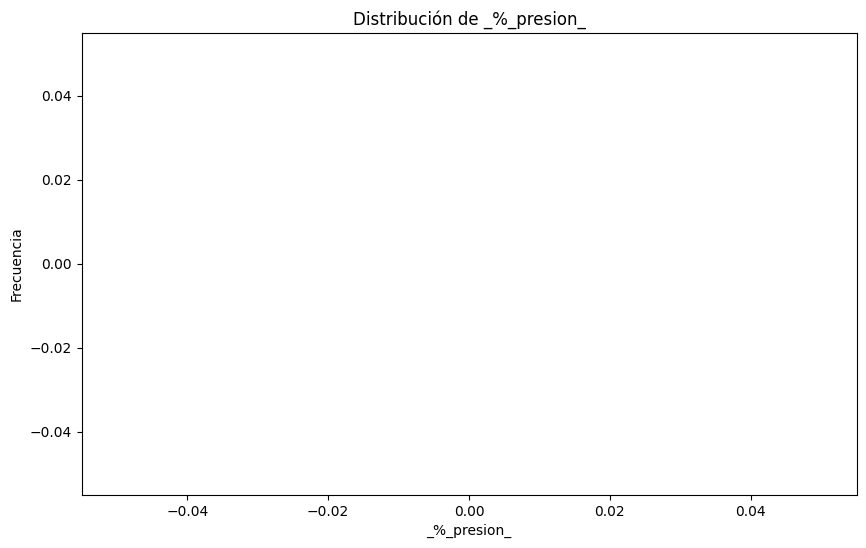


Visualizando la tendencia promedio de '_%_presion_' a lo largo de 'año':


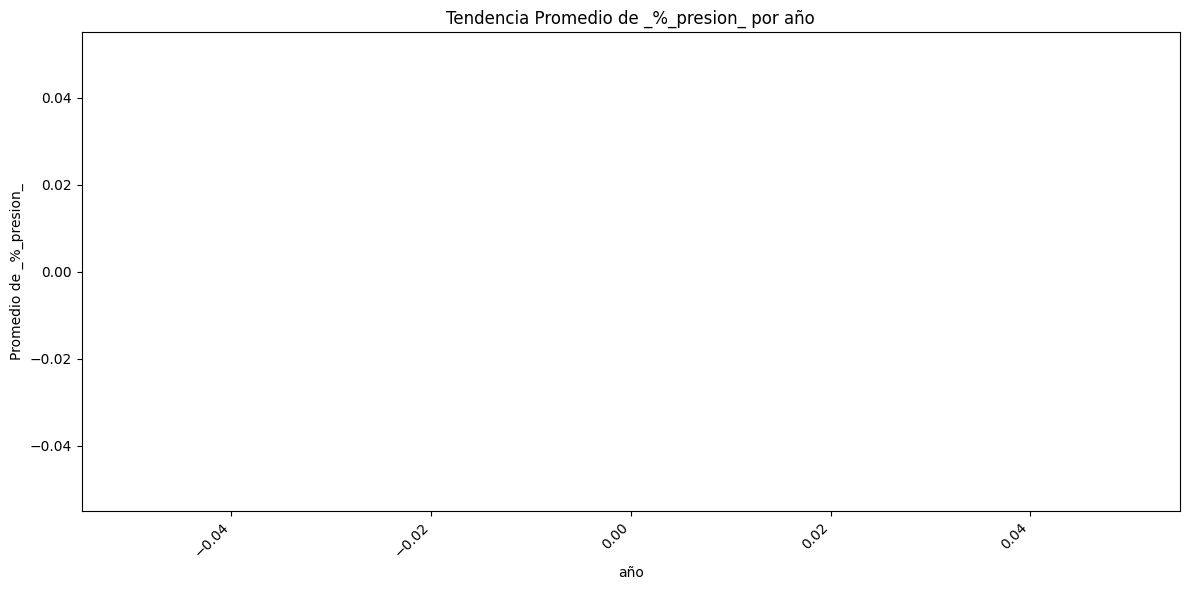


Visualizando la comparación promedio de '_%_presion_' por 'tipo_presion':


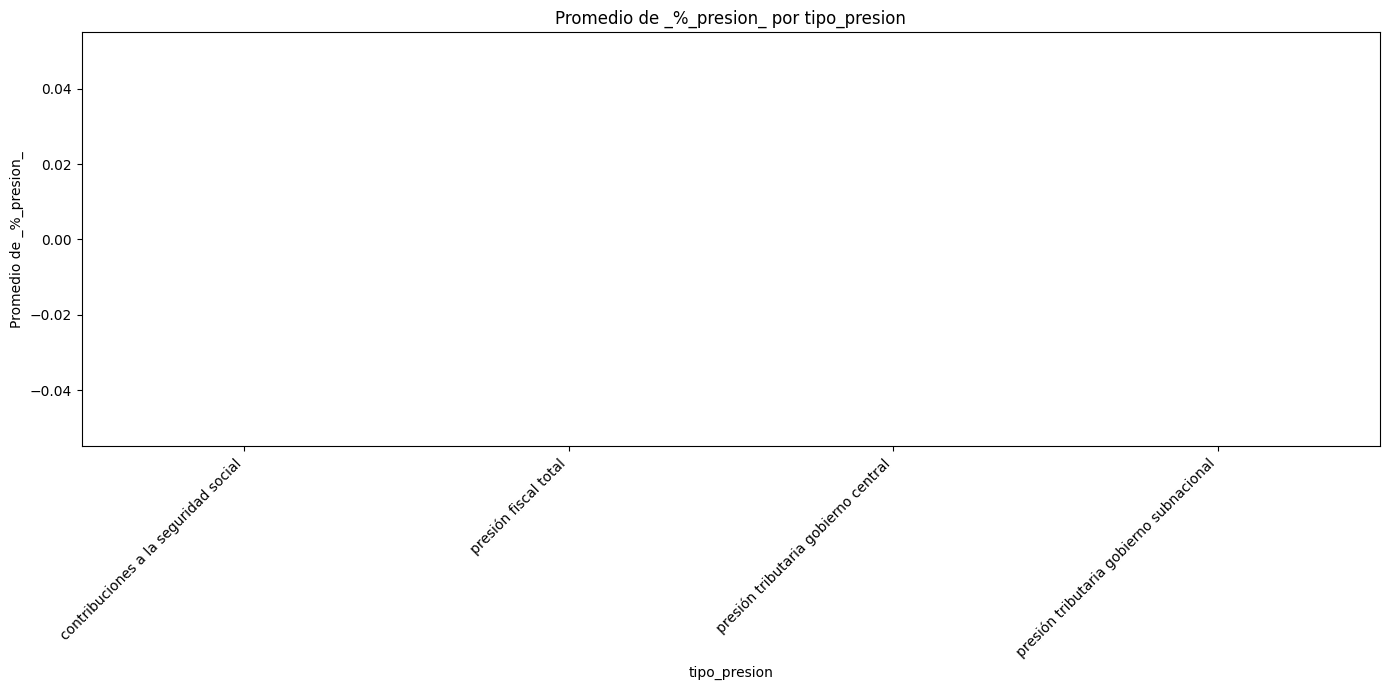


Visualizando la comparación promedio de '_%_presion_' por 'region':


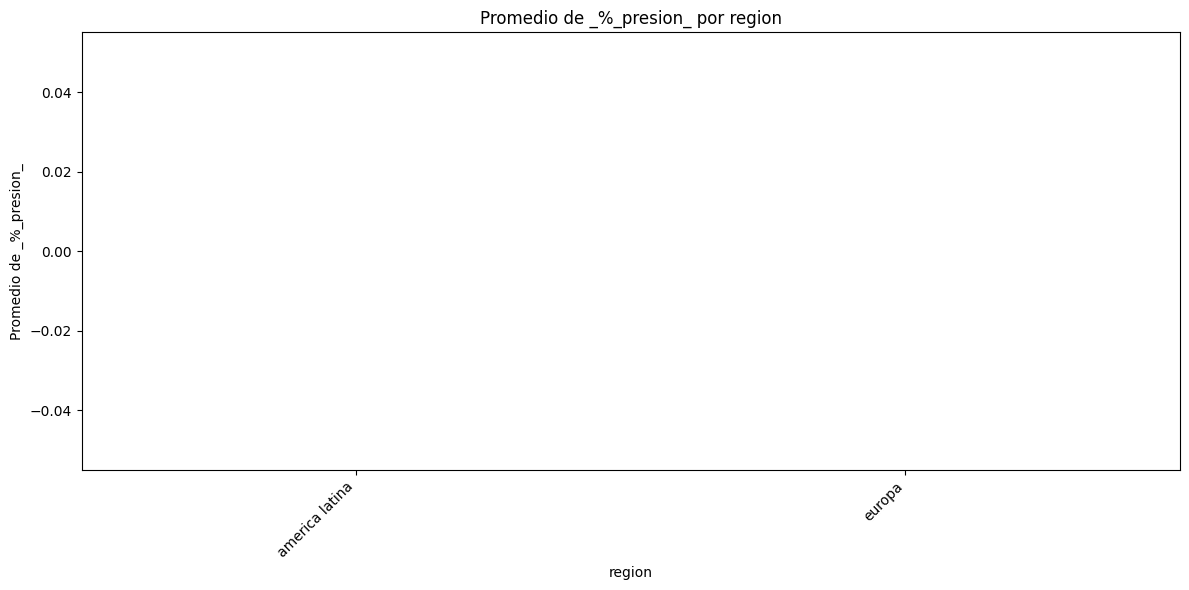


--- Fin del Análisis Exploratorio de Datos (EDA) ---


from matplotlib import pyplot as plt
_df_15['año'].plot(kind='hist', bins=20, title='año')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['_%_presion_'].plot(kind='hist', bins=20, title='_%_presion_')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='año', y='_%_presion_', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['año'].plot(kind='line', figsize=(8, 4), title='año')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['_%_presion_'].plot(kind='line', figsize=(8, 4), title='_%_presion_')
plt.gca().spines[['top', 'right']].set_visible(False)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Para mejor visualización en Colab

# Asegúrate de que el DataFrame 'df' ya esté cargado, limpio y con formato CORRECTO
# Es fundamental que la columna '_%_presion_' sea de tipo numérico (float64 o int64)
# para que los gráficos funcionen correctamente. Si la formateaste a string para visualización,
# el script de EDA incluye una conversión temporal.

if df is not None:
    print("\n--- Iniciando Análisis Exploratorio de Datos (EDA) ---")

    # --- Nombres de las columnas clave (asegúrate de que coincidan con tu DataFrame limpio) ---
    col_region = 'region'
    col_pais = 'país'
    col_año = 'año'
    col_dinero_presion = '_%_presion_' # Nombre normalizado para la columna de dinero
    col_tipo_presion = 'tipo_presion' # Nombre normalizado

    # --- Preparar columna de dinero para visualización/describe si es string ---
    # Creamos una copia temporal para no alterar el DataFrame original 'df'
    df_eda = df.copy()
    col_dinero_presion_eda = col_dinero_presion # Nombre de la columna a usar en EDA

    # Si la columna de dinero fue formateada a string para visualización, conviértela a numérica temporalmente
    if df_eda[col_dinero_presion].dtype == 'object':
        print(f"\nConvirtiendo '{col_dinero_presion}' a numérico temporalmente para EDA...")
        try:
            # Usamos la misma lógica de limpieza y conversión numérica que refinamos antes
            df_eda[col_dinero_presion] = df_eda[col_dinero_presion].astype(str)
            df_eda[col_dinero_presion] = df_eda[col_dinero_presion].str.replace('$', '', regex=False)
            df_eda[col_dinero_presion] = df_eda[col_dinero_presion].str.replace('USD', '', regex=False)
            df_eda[col_dinero_presion] = df_eda[col_dinero_presion].str.replace('%', '', regex=False)
            df_eda[col_dinero_presion] = df_eda[col_dinero_presion].str.strip()

            # **UTILIZA LOS MISMOS ARGUMENTOS DECIMAL Y THOUSANDS QUE FUNCIONARON EN EL PASO DE FORMATO**
            # Asumiendo formato americano (punto decimal, coma miles) para la conversión:
            df_eda[col_dinero_presion] = pd.to_numeric(df_eda[col_dinero_presion], errors='coerce', decimal='.', thousands=',')
            col_dinero_presion_eda = col_dinero_presion # Ahora apunta a la columna numérica temporal

            print(f"Columna temporal '{col_dinero_presion_eda}' creada y convertida a numérica para EDA.")

        except Exception as e:
            print(f"Advertencia: Error al convertir '{col_dinero_presion}' a numérico temporalmente para EDA. No se incluirá en análisis numéricos. Error: {e}")
            df_eda[col_dinero_presion] = float('nan') # Aseguramos que no sea numérica si falló

    # --- Paso 1: Resumen de Datos ---
    print("\nResumen General del DataFrame:")
    df_eda.info() # Usar df_eda que puede tener la columna de dinero numérica temporal

    print("\nEstadísticas Descriptivas para Columnas Numéricas:")
    # describe() funcionará correctamente en df_eda si la columna de dinero es numérica
    display(df_eda.describe())

    print("\nConteo de Valores Únicos por Columnas Categóricas Clave:")
    columnas_categoricas_para_conteo = [col_region, col_pais, col_tipo_presion]
    for col in columnas_categoricas_para_conteo:
         if col in df_eda.columns: # Verificar en df_eda por si se eliminaron columnas en limpieza
             print(f"\nColumna: '{col}'")
             print(f"Valores únicos: {df_eda[col].nunique()}")
             # Mostrar los 10 valores más frecuentes (puedes ajustar .head())
             display(df_eda[col].value_counts().head())
         else:
             print(f"Advertencia: La columna '{col}' no se encontró para el conteo de valores únicos.")


    # --- Paso 2: Distribución de Indicadores Clave ---

    # Distribución de la Presión Fiscal (Dinero)
    if col_dinero_presion_eda in df_eda.columns and pd.api.types.is_numeric_dtype(df_eda[col_dinero_presion_eda]):
        print(f"\nVisualizando la distribución de '{col_dinero_presion}':")
        plt.figure(figsize=(10, 6))
        sns.histplot(df_eda[col_dinero_presion_eda].dropna(), kde=True)
        plt.title(f'Distribución de {col_dinero_presion}')
        plt.xlabel(col_dinero_presion)
        plt.ylabel('Frecuencia')
        plt.show()
    else:
        print(f"Advertencia: No se pudo visualizar la distribución de '{col_dinero_presion}' ya que no es numérica en df_eda.")


    # --- Paso 3: Tendencias Temporales ---

    # Tendencia de la Presión Fiscal a lo largo del Año (Promedio por Año)
    if col_año in df_eda.columns and col_dinero_presion_eda in df_eda.columns and pd.api.types.is_numeric_dtype(df_eda[col_año]) and pd.api.types.is_numeric_dtype(df_eda[col_dinero_presion_eda]):
        print(f"\nVisualizando la tendencia promedio de '{col_dinero_presion}' a lo largo de '{col_año}':")
        plt.figure(figsize=(12, 6))
        # Agrupar por año y calcular el promedio
        data_tendencia = df_eda.groupby(col_año)[col_dinero_presion_eda].mean().reset_index()
        sns.lineplot(x=col_año, y=col_dinero_presion_eda, data=data_tendencia)
        plt.title(f'Tendencia Promedio de {col_dinero_presion} por {col_año}')
        plt.xlabel(col_año)
        plt.ylabel(f'Promedio de {col_dinero_presion}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Advertencia: No se pudo visualizar la tendencia temporal. Asegúrate de que 'año' y el indicador de dinero sean numéricos en df_eda.")

    # --- Paso 4: Comparaciones por Categoría ---

    # Comparación de la Presión Fiscal por 'tipo_presion' (Promedio)
    if col_tipo_presion in df_eda.columns and col_dinero_presion_eda in df_eda.columns and pd.api.types.is_numeric_dtype(df_eda[col_dinero_presion_eda]):
        print(f"\nVisualizando la comparación promedio de '{col_dinero_presion}' por '{col_tipo_presion}':")
        plt.figure(figsize=(14, 7))
        # Calcular el promedio por tipo de presión y ordenar
        data_comparacion = df_eda.groupby(col_tipo_presion)[col_dinero_presion_eda].mean().sort_values(ascending=False).reset_index()
        sns.barplot(x=col_tipo_presion, y=col_dinero_presion_eda, data=data_comparacion)
        plt.title(f'Promedio de {col_dinero_presion} por {col_tipo_presion}')
        plt.xlabel(col_tipo_presion)
        plt.ylabel(f'Promedio de {col_dinero_presion}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Advertencia: No se pudo visualizar la comparación por 'tipo_presion'. Asegúrate de que la columna de dinero sea numérica en df_eda.")

    # Comparación de la Presión Fiscal por 'region' (Promedio)
    if col_region in df_eda.columns and col_dinero_presion_eda in df_eda.columns and pd.api.types.is_numeric_dtype(df_eda[col_dinero_presion_eda]):
        print(f"\nVisualizando la comparación promedio de '{col_dinero_presion}' por '{col_region}':")
        plt.figure(figsize=(12, 6))
        # Calcular el promedio por region y ordenar
        data_comparacion_region = df_eda.groupby(col_region)[col_dinero_presion_eda].mean().sort_values(ascending=False).reset_index()
        sns.barplot(x=col_region, y=col_dinero_presion_eda, data=data_comparacion_region)
        plt.title(f'Promedio de {col_dinero_presion} por {col_region}')
        plt.xlabel(col_region)
        plt.ylabel(f'Promedio de {col_dinero_presion}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
         print("Advertencia: No se pudo visualizar la comparación por 'region'. Asegúrate de que la columna de dinero sea numérica en df_eda.")

    # Puedes añadir más análisis y visualizaciones aquí
    # Por ejemplo, un boxplot para ver la distribución de la presión fiscal por país o región.
    # O un scatter plot si tuvieras dos columnas numéricas para ver su relación.


    print("\n--- Fin del Análisis Exploratorio de Datos (EDA) ---")

else:
    print("\nEl DataFrame 'df' no se cargó, limpió o formateó correctamente. No se puede proceder con el Análisis Exploratorio.")